# D8 - Building fires in Estonia
## Karolin Kivilaan, Kati Ilus, Geitrud Pank

In [13]:
import numpy as np
import pandas as pd
import apyori
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_df = pd.read_csv("hoonetulekahjud.csv")
data = data_df.values
data_with_months = []
data_copy = data.copy()
for i in data_copy:
    if i[4] == 1:
        i[4] = 'January'
    elif i[4] == 2:
        i[4] = 'February'
    elif i[4] == 3:
        i[4] = 'March'
    elif i[4] == 4:
        i[4] = 'April'
    elif i[4] == 5:
        i[4] = 'May'
    elif i[4] == 6:
        i[4] = 'June'
    elif i[4] == 7:
        i[4] = 'July'
    elif i[4] == 8:
        i[4] = 'August'
    elif i[4] == 9:
        i[4] = 'September'
    elif i[4] == 10:
        i[4] = 'October'
    elif i[4] == 11:
        i[4] = 'November'
    elif i[4] == 12:
        i[4] = 'December'
    data_with_months.append(i)
data_df

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2
...,...,...,...,...,...,...
5660,Ida-Viru maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5661,Ida-Viru maakond,2020,Eluhooned,Lahtise tule kasutamisel,11,1
5662,Harju maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5663,Harju maakond,2020,Eluhooned,!Sisestamata!,11,1


### Basic plotting

In [2]:
year2014 = []
year2015 = []
year2016 = []
year2017 = []
year2018 = []
year2019 = []
year2020 = []
year2014_month = []
year2015_month = []
year2016_month = []
year2017_month = []
year2018_month = []
year2019_month = []
year2020_month = []
for i in range(len(data)):
    if data[i][1] == 2014:
        year2014.append(data[i])
        year2014_month.append(data_with_months[i])
    elif data[i][1] == 2015:
        year2015.append(data[i])
        year2015_month.append(data_with_months[i])
    elif data[i][1] == 2016:
        year2016.append(data[i])
        year2016_month.append(data_with_months[i])
    elif data[i][1] == 2017:
        year2017.append(data[i])
        year2017_month.append(data_with_months[i])
    elif data[i][1] == 2018:
        year2018.append(data[i])
        year2018_month.append(data_with_months[i])
    elif data[i][1] == 2019:
        year2019.append(data[i])
        year2019_month.append(data_with_months[i])
    elif data[i][1] == 2020:
        year2020.append(data[i])
        year2020_month.append(data_with_months[i])
#print(year2014)
data_by_years = [year2014, year2015, year2016, year2017, year2018, year2019, year2020]

In [3]:
def fires_in_a_year(year):
    counter = 0
    for i in year:
        counter += int(i[5])
    return counter
print(fires_in_a_year(year2016))

1401


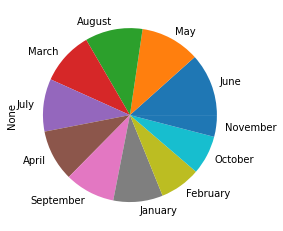

June         101
May           96
August        93
March         86
July          85
April         83
September     81
January       80
February      66
October       63
November      35
dtype: int64

In [179]:
def fires_by_month(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[4])
    return array
o = pd.Index(fires_by_month(year2020_month))
o.value_counts().plot(kind='pie')
plt.show()

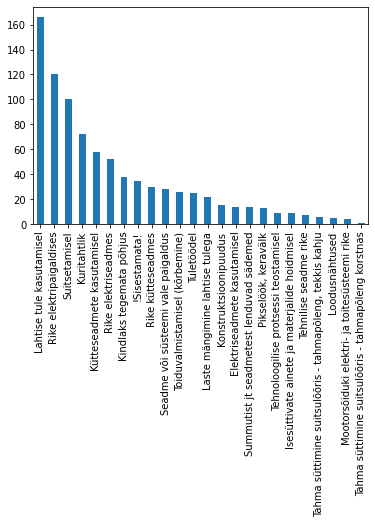

In [5]:
def different_causes(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[3])
    return array
o = pd.Index(different_causes(year2020))
o.value_counts().plot(kind='bar')
plt.show()

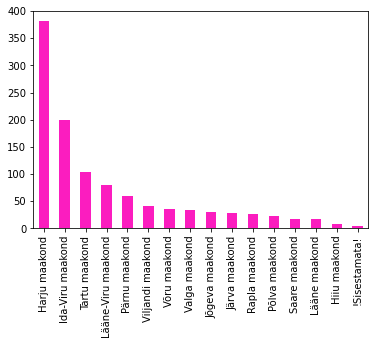

In [6]:
def fires_by_county(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[0])
    return array
y2019 = pd.Index(fires_by_county(year2019))
y2019.value_counts().plot(kind='bar', color='#fb1dbf')
plt.show()

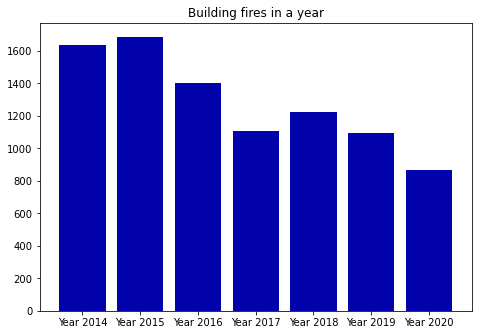

In [159]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Year 2014', 'Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019', 'Year 2020']
counts = [fires_in_a_year(year2014), fires_in_a_year(year2015), fires_in_a_year(year2016), fires_in_a_year(year2017), fires_in_a_year(year2018), fires_in_a_year(year2019), fires_in_a_year(year2020)] 
ax.bar(langs,counts, color='#0203aa')
ax.set_title('Building fires in a year')
plt.show()

In [186]:
#Maakonnad ja arvud 2019 aastal
year = y2019.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2019.value_counts().loc[i]])
county_counter = pd.DataFrame(count)
county_counter

,0,1
0,Harju maakond,381
1,Ida-Viru maakond,200
2,Tartu maakond,104
3,Lääne-Viru maakond,79
4,Pärnu maakond,60
5,Viljandi maakond,41
6,Võru maakond,36
7,Valga maakond,34
8,Jõgeva maakond,31
9,Järva maakond,28


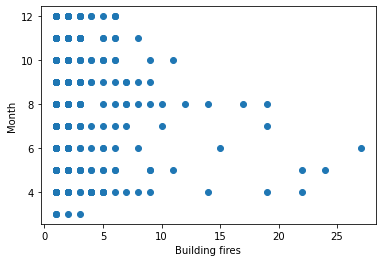

In [8]:
#Clustering fires by month
k = data_df.loc[data_df['Aasta'] == 2014]
plt.scatter(k['Hoonetulekahjud'], k['Kuu'])
plt.xlabel('Building fires')
plt.ylabel('Month')
plt.show()

In [131]:
import sklearn
from sklearn.model_selection import train_test_split
data_single = []
data_copy = data.copy()
for i in data_copy:
    for j in range(i[5]):
        i[5] = 1
        data_single.append(i)
single = pd.DataFrame(data=data_df, columns=['Maakond', 'Aasta', 'Hoone liik', 'Tekkepõhjus',
                                             'Kuu', 'Hoonetulekahjud'])

In [138]:
data_dum = pd.get_dummies(data_df, columns=['Maakond', 'Hoone liik', 
                                                                  'Tekkepõhjus'])
test, train = sklearn.model_selection.train_test_split(data_dum, train_size=0.7)
X_train = train.drop(columns=['Hoonetulekahjud'])
y_train = train['Hoonetulekahjud']
X_test = test.drop(columns=['Hoonetulekahjud'])
y_test = test['Hoonetulekahjud']


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
train_X, test_X,train_y, test_y = train_test_split(X_train, y_train,random_state=100, 
                                                   test_size = 0.2)
# TODO
rf = RandomForestRegressor(criterion='mse',max_depth=6,n_estimators=200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [140]:
from sklearn.metrics import make_scorer, mean_squared_error
def RMSE(true_y, preds):
    return np.sqrt(mean_squared_error(true_y, preds))
rmse_scorer = make_scorer(RMSE, greater_is_better=False) #make own scorer

In [141]:
RMSE(rf.predict(X_train),y_train)

0.8018420461153695

In [142]:
RMSE(rf.predict(X_test),y_test)

1.192152009747647

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results_df = pd.DataFrame(columns=['model', 'accuracy'])

# TODO: uncomment and fill in

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '1-NN', 'accuracy': acc }, ignore_index=True)
results_df
#print out the dataframe

,model,accuracy
0,1-NN,0.586129


In [144]:
for i in range(3, 13, 4):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347


In [145]:
model = KNeighborsClassifier(n_neighbors = 1, metric='manhattan')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '1-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
for i in range(3, 13, 4):
    model = KNeighborsClassifier(n_neighbors = i, metric='manhattan')
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347
4,"1-NN, metric=manhattan",0.585624
5,"3-NN, metric=manhattan",0.688272
6,"7-NN, metric=manhattan",0.717276
7,"11-NN, metric=manhattan",0.723581


In [146]:
results_df.sort_values(['accuracy'], ascending=False) 

,model,accuracy
3,11-NN,0.725347
7,"11-NN, metric=manhattan",0.723581
2,7-NN,0.720303
6,"7-NN, metric=manhattan",0.717276
1,3-NN,0.688525
5,"3-NN, metric=manhattan",0.688272
0,1-NN,0.586129
4,"1-NN, metric=manhattan",0.585624


In [147]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3a' , 'accuracy': acc }, ignore_index=True)
results_df
# TODO

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347
4,"1-NN, metric=manhattan",0.585624
5,"3-NN, metric=manhattan",0.688272
6,"7-NN, metric=manhattan",0.717276
7,"11-NN, metric=manhattan",0.723581
8,Model 3a,0.638335


In [148]:
model = tree.DecisionTreeClassifier(random_state = 3)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3b' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347
4,"1-NN, metric=manhattan",0.585624
5,"3-NN, metric=manhattan",0.688272
6,"7-NN, metric=manhattan",0.717276
7,"11-NN, metric=manhattan",0.723581
8,Model 3a,0.638335
9,Model 3b,0.631778


In [149]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3d' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347
4,"1-NN, metric=manhattan",0.585624
5,"3-NN, metric=manhattan",0.688272
6,"7-NN, metric=manhattan",0.717276
7,"11-NN, metric=manhattan",0.723581
8,Model 3a,0.638335
9,Model 3b,0.631778


In [150]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy', min_samples_leaf = 10)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3e' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,1-NN,0.586129
1,3-NN,0.688525
2,7-NN,0.720303
3,11-NN,0.725347
4,"1-NN, metric=manhattan",0.585624
5,"3-NN, metric=manhattan",0.688272
6,"7-NN, metric=manhattan",0.717276
7,"11-NN, metric=manhattan",0.723581
8,Model 3a,0.638335
9,Model 3b,0.631778


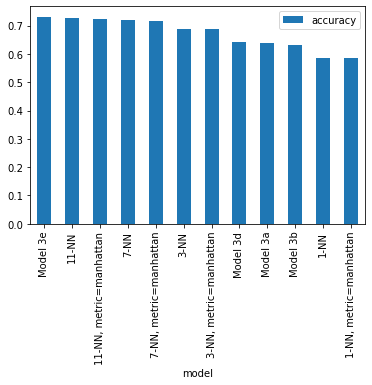

In [151]:
 results_df.sort_values(['accuracy'], ascending=False).plot(kind='bar', x='model', y='accuracy')
plt.show()

In [152]:
#Highest accuracy
results_df.sort_values(['accuracy'], ascending=False).head(1)

,model,accuracy
11,Model 3e,0.7314
